# Import libraries

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# scikit
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import StandardScaler

# Import Air Quality Data

In [3]:
# import data using csv
with open("/Users/jadeg/Documents/UW/Spring/Erdos/annual_aqi_by_county_2004.csv", 'r') as x:
    aqi_data_list = list(csv.reader(x, delimiter=","))

np.size(aqi_data_list)

# create an empty numpy array for all elements to go into as strings
aqi_data_str = np.empty((1122-1, 18), dtype=object)
# pull out the first row as labels
aqi_labels = aqi_data_list[0]
# put everything else into aqi_data_str
for row_i in range(1,len(aqi_data_list)):
    aqi_data_str[row_i-1,:] = aqi_data_list[row_i]

print(aqi_labels)
print(aqi_data_str)

# features will only include 'Days with AQI' and past that
feature_start_index = aqi_labels.index('Days with AQI')
# pull out these features and save them as X
X = aqi_data_str[:, feature_start_index:].astype(float)


['State', 'County', 'Year', 'Days with AQI', 'Good Days', 'Moderate Days', 'Unhealthy for Sensitive Groups Days', 'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI', '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']
[['Alabama' 'Baldwin' '2004' ... '185' '86' '0']
 ['Alabama' 'Barbour' '2004' ... '0' '49' '0']
 ['Alabama' 'Clay' '2004' ... '185' '98' '0']
 ...
 ['Wyoming' 'Sublette' '2004' ... '355' '1' '0']
 ['Wyoming' 'Sweetwater' '2004' ... '0' '0' '366']
 ['Wyoming' 'Teton' '2004' ... '321' '25' '2']]


# Import pre-processed maternal data

In [3]:
natal_data = np.load('finalfilt_nat2004.npz', allow_pickle=True)

print(natal_data.files)

X = natal_data['X']

['X']


In [28]:
print(X[0])
print(X[:,-4])

['2' '2' '2' '22' '1' '2' '2' '1' '1' '1' '6' '1' '17' '5' '99' '25' '1'
 '6' '1' '0' '0' '0' '1' '1' '3' '14' '35' '4' '2' '0' '0' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '1' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '1' '2' '2' '2' '2' '1' '2'
 '1' '3' '1' 'M' '2' '3' 'Anchorage Munic']
['M' 'M' 'M' ... 'F' 'M' 'M']


In [29]:
print(np.sum(X[:, -2] == '1'))
print(np.sum(X[:, -2] == '2'))
print(np.sum(X[:, -2] == '3'))
print(np.sum(X[:, -2] == '4'))


56162
233543
3160361
3158


In [44]:
#setting female/male to 0/1 so we can convert the array to integers

# copy of natality array to not mess up original
X_new = X.copy()

# replace 'F' with 0 and 'M' with 1 in col -4
X_new[:, -4] = np.where(X[:, -4] == 'F', 0, 1)

print(X_new[:, -4])


[1 1 1 ... 0 1 1]


In [45]:
# there are Z's in cols 4,5,6,7. Convert them to 8's

X_rev = X_new.copy()

cols_to_fix = [4, 5, 6, 7]

for col in cols_to_fix:
    X_rev[:, col] = np.where(X_new[:, col] == 'Z', '8', X_new[:, col])

In [46]:
X_rev2 = X_rev.copy()

# Replace empty strings in column 9 with '99' (mrace mother's race)
X_rev2[:, 9] = np.where(X_rev[:, 9] == '', '99', X_rev[:, 9])

# Replace blanks in column 12 with '9' (dmeduc mothers education)
X_rev2[:, 12] = np.where(X_rev[:, 12] == '', '9', X_rev[:, 12])

# Replace blanks in column 13 with '6' (meduc_rec mothers ed in number of years)
X_rev2[:, 13] = np.where(X_rev[:, 13] == '', '6', X_rev[:, 13])

# Replace blanks in column 15 with '99' (ufagecomb father's age)
X_rev2[:, 15] = np.where(X_rev[:, 15] == '', '99', X_rev[:, 15])

# Replace blanks in column 18 with '99' (frace father's race)
X_rev2[:, 18] = np.where(X_rev[:, 18] == '', '99', X_rev[:, 18])

# Replace blanks in column 24 with '99' (mpcb month prenatal care began)
X_rev2[:, 24] = np.where(X_rev[:, 24] == '', '99', X_rev[:, 24])

# Replace blanks in column 27 with '5' (u_apncu adequacy of prenatal care)
X_rev2[:, 27] = np.where(X_rev[:, 27] == '', '5', X_rev[:, 27])

# Replace blanks in column 28 with '9' (tobuse tobacco use)
X_rev2[:, 28] = np.where(X_rev[:, 28] == '', '9', X_rev[:, 28])

# Replace blanks in column 29 with '99' (cigs)
X_rev2[:, 29] = np.where(X_rev[:, 29] == '', '99', X_rev[:, 29])

# Replace blanks in column 30 with '99' (drinnks)
X_rev2[:, 30] = np.where(X_rev[:, 30] == '', '99', X_rev[:, 30])

for i in np.arange(31, 71):
    X_rev2[:, i] = np.where(X_rev[:, i] == '', '9', X_rev[:, i])


### load the state names and add to file

In [47]:
state_names = np.load('correctstatenames.npz', allow_pickle=True)

print(state_names.files)

states = state_names['X']

['X']


In [48]:
states_col = states.reshape(-1, 1)          # Make it a column
X_rev2_states = np.hstack([X_rev2, states_col])

In [11]:
#remove the unknowns for eclampsia

nat_filt = [row for i, row in enumerate(X_rev2_states) if row[-39] != '9']
nat_filt = np.array(nat_filt)


In [50]:
# remove unknown for low birth weight
nat_filt_lbw = [row for i, row in enumerate(X_rev2_states) if row[-3] != '4']
nat_filt_lbw = np.array(nat_filt_lbw)

In [ ]:
# separate the county and state names
# turn the rest into integer array
 
counties_names = nat_filt[:, -2].reshape(-1, 1)
state_abbrev = nat_filt[:, -1].reshape(-1, 1)
X_numeric = nat_filt[:, :-2].astype(int)

X_final = np.hstack([X_numeric, counties_names, state_abbrev])

In [51]:
counties_names_lbw = nat_filt_lbw[:, -2].reshape(-1, 1)
state_abbrev_lbw = nat_filt_lbw[:, -1].reshape(-1, 1)
X_numeric_lbw = nat_filt_lbw[:, :-2].astype(int)

X_final_lbw = np.hstack([X_numeric_lbw, counties_names_lbw, state_abbrev_lbw])

In [35]:
X_final

array([[2, 2, 2, ..., 3, 'Anchorage Munic', 'AK'],
       [2, 1, 1, ..., 3, 'Anchorage Munic', 'AK'],
       [2, 1, 1, ..., 3, 'Anchorage Munic', 'AK'],
       ...,
       [0, 4, 2, ..., 3, 'Kings', 'NY'],
       [0, 4, 2, ..., 3, 'Kings', 'NY'],
       [0, 1, 1, ..., 3, 'Queens', 'NY']],
      shape=(3437138, 79), dtype=object)

In [36]:
np.savez_compressed('X_final_no_AQI.npz', X=X_final)

In [52]:
np.savez_compressed('X_final_no_AQI_lbw.npz', X=X_final_lbw)

in X-final, eclampsia is -39, -4 is preterm, -3 is birth weight, -48 anemia 

 - 'urf_anemia': Anemia 
 -  'urf_eclam': Eclampsia
 -  'gestrec3': Combined Gestation Recode 3 (preterm or not)
 -   'bwtr4': Birth Weight Recode 4 (convenient categories)

In [9]:
for col in range(X_rev2.shape[1] - 1):  # skip last column (county)
    for row in range(X_rev2.shape[0]):
        value = X_rev2[row, col]
        try:
            int(value)
        except:
            print(f"Bad value at row {row}, col {col}: {repr(value)}")


Bad value at row 3391397, col 6: '0'


## Get final X train data matrix

Includes AQI

In [4]:
X_mat_AQI = np.load('X_mat_AQI.npz', allow_pickle=True)

print(X_mat_AQI.files)

X_AQI = X_mat_AQI['X']


X_mat_only = np.load('X_mat_only.npz', allow_pickle=True)

print(X_mat_only.files)

X_only = X_mat_only['X']

['X']
['X']


In [3]:
X_AQI.shape

(3235049, 88)

In [5]:
# for low birth weight

X_mat_AQI_lbw = np.load('X_mat_AQI_lw.npz', allow_pickle=True)
X_AQI_lbw = X_mat_AQI_lbw['X']


X_mat_only_lbw = np.load('X_mat_only_lw.npz', allow_pickle=True)
X_only_lbw = X_mat_only_lbw['X']

## Get Y labels data

After adding AQI, which changes sample size

In [6]:
# eclampsia data (labels)

Y_eclampsia = np.load('Yeclam.npz', allow_pickle=True)
print(Y_eclampsia.files)

Y_eclamp = Y_eclampsia['X']

['X']


In [5]:
Y_eclamp.shape

(3235049,)

In [7]:
# for low birth weight
Y_lw = np.load('Y_lw.npz', allow_pickle=True)
Y_lbw = Y_lw['X']

# Split data into train (80%) and test (20%)

In [ ]:
Xtr, Xte, Ytr, Yte = train_test_split(X_AQI, Y_eclamp, test_size=0.2)

# change the shapes to have features as rows, samples as columns
Xtr = Xtr.T
Xte = Xte.T

print(f'Xtr {Xtr.shape}')
print(f'Ytr {Ytr.shape}')
print(f'Xte {Xte.shape}')
print(f'Yte {Yte.shape}')

In [2]:
# if computer cant handle, download the premade train test files

Xtr_AQI = np.load('Xtr_AQI.npz', allow_pickle=True)
Xtr_AQI = Xtr_AQI['X']

Ytr_AQI = np.load('Ytr_AQI.npz', allow_pickle=True)
Ytr_AQI = Ytr_AQI['X']

Xte_AQI = np.load('Xte_AQI.npz', allow_pickle=True)
Xte_AQI = Xte_AQI['X']

Yte_AQI = np.load('Yte_AQI.npz', allow_pickle=True)
Yte_AQI = Yte_AQI['X']

In [5]:
Xtr_AQI.shape

(88, 2588039)

In [3]:
Ytr_AQI = Ytr_AQI.astype(int)
Yte_AQI = Yte_AQI.astype(int)

Xtr_AQI = Xtr_AQI.astype(int)
Xte_AQI = Xte_AQI.astype(int)

In [4]:
# again if computer can't handle, load the split files - for low birth weight

Xtr_AQI_lw = np.load('Xtr_AQI_lw.npz', allow_pickle=True)
Xtr_AQI_lbw = Xtr_AQI_lw['X']

Ytr_AQI_lw = np.load('Ytr_AQI_lw.npz', allow_pickle=True)
Ytr_AQI_lbw = Ytr_AQI_lw['X']

Xte_AQI_lw = np.load('Xte_AQI_lw.npz', allow_pickle=True)
Xte_AQI_lbw = Xte_AQI_lw['X']

Yte_AQI_lw = np.load('Yte_AQI_lw.npz', allow_pickle=True)
Yte_AQI_lbw = Yte_AQI_lw['X']

In [5]:
Ytr_AQI_lbw = Ytr_AQI_lbw.astype(int)
Yte_AQI_lbw = Yte_AQI_lbw.astype(int)

### Train/test sets for no AQI dataset

In [6]:
Xtr_only = np.load('Xtr_only.npz', allow_pickle=True)
Xtr_only = Xtr_only['X']
print(np.shape(Xtr_only))

Ytr_only = np.load('Ytr_only.npz', allow_pickle=True)
Ytr_only = Ytr_only['X']

Xte_only = np.load('Xte_only.npz', allow_pickle=True)
Xte_only = Xte_only['X']

Yte_only = np.load('Yte_only.npz', allow_pickle=True)
Yte_only = Yte_only['X']

Ytr_only = Ytr_only.astype(int)
Yte_only = Yte_only.astype(int)

(73, 2588039)


In [7]:
Xtr_only_lw = np.load('Xtr_only_lw.npz', allow_pickle=True)
Xtr_only_lbw = Xtr_only_lw['X']

Ytr_only_lw = np.load('Ytr_only_lw.npz', allow_pickle=True)
Ytr_only_lbw = Ytr_only_lw['X']

Xte_only_lw = np.load('Xte_only_lw.npz', allow_pickle=True)
Xte_only_lbw = Xte_only_lw['X']

Yte_only_lw = np.load('Yte_only_lw.npz', allow_pickle=True)
Yte_only_lbw = Yte_only_lw['X']

Ytr_only_lbw = Ytr_only_lbw.astype(int)
Yte_only_lbw = Yte_only_lbw.astype(int)

## Apply PCA

In [11]:
# apply PCA to Xtr_AQI
pca = PCA(n_components=4)
Xtr_AQI_pca = pca.fit_transform(Xtr_AQI.T)

print("Shape of Xtr_AQI_pca:", Xtr_AQI_pca.shape)

modes = pca.components_


Shape of Xtr_AQI_pca: (2588039, 4)


In [12]:
# apply PCA to Xte_AQI
Xte_AQI_pca = pca.transform(Xte_AQI.T)

print("Shape of Xte_AQI_pca:", Xte_AQI_pca.shape)

Shape of Xte_AQI_pca: (647010, 4)


In [ ]:
# in PCA code file, we showed that 4 PC modes produce a 95% approximation of the original data 

In [11]:
# apply PCA to Xtr_AQI_lbw
pca = PCA(n_components=4)
Xtr_AQI_pca_lbw = pca.fit_transform(Xtr_AQI_lbw.T)

print("Shape of Xtr_AQI_pca_lbw:", Xtr_AQI_pca_lbw.shape)

Shape of Xtr_AQI_pca_lbw: (2597534, 4)


In [12]:
# apply PCA to Xte_AQI_lbw
Xte_AQI_pca_lbw = pca.transform(Xte_AQI_lbw.T)

print("Shape of Xte_AQI_pca_lbw:", Xte_AQI_pca_lbw.shape)

Shape of Xte_AQI_pca_lbw: (649384, 4)


### PCA for no AQI dataset

In [13]:
# apply PCA to Xtr_only
pca = PCA(n_components=4)
Xtr_only_pca = pca.fit_transform(Xtr_only.T)

print("Shape of Xtr_only_pca:", Xtr_only_pca.shape)

# apply PCA to Xte_only
Xte_only_pca = pca.transform(Xte_only.T)

print("Shape of Xte_only_pca:", Xte_only_pca.shape)

Shape of Xtr_only_pca: (2588039, 4)
Shape of Xte_only_pca: (647010, 4)


In [14]:
# apply PCA to Xtr_only_lbw
pca = PCA(n_components=4)
Xtr_only_pca_lbw = pca.fit_transform(Xtr_only_lbw.T)

print("Shape of Xtr_only_pca_lbw:", Xtr_only_pca_lbw.shape)

# apply PCA to Xte_only_lbw
Xte_only_pca_lbw = pca.transform(Xte_only_lbw.T)

print("Shape of Xte_only_pca_lbw:", Xte_only_pca_lbw.shape)

Shape of Xtr_only_pca_lbw: (2597534, 4)
Shape of Xte_only_pca_lbw: (649384, 4)


# Classify!!

## Ridge Classifier - Eclampsia without AQI

In [35]:
print(np.shape(Xtr_only))
print(np.shape(Ytr_only))

(73, 2588039)
(2588039,)


In [36]:
RidgeCL = RidgeClassifierCV(class_weight='balanced')
RidgeCL.fit(Xtr_only.T, Ytr_only)

RidgeClassifierCV(class_weight='balanced')

In [37]:
print("Training Score: {}".format(RidgeCL.score(Xtr_only.T, Ytr_only)))
print("Testing Score: {}".format(RidgeCL.score(Xte_only.T, Yte_only)))

tr_scores_ridge_only = cross_val_score(RidgeCL, Xtr_only.T, Ytr_only, cv=5)
print("{} training accuracy with a standard deviation of {}".format(tr_scores_ridge_only.mean(), tr_scores_ridge_only.std()))

Training Score: 0.7783823968649622
Testing Score: 0.7787483964699154
0.7785914356882414 training accuracy with a standard deviation of 0.0012893474758359264


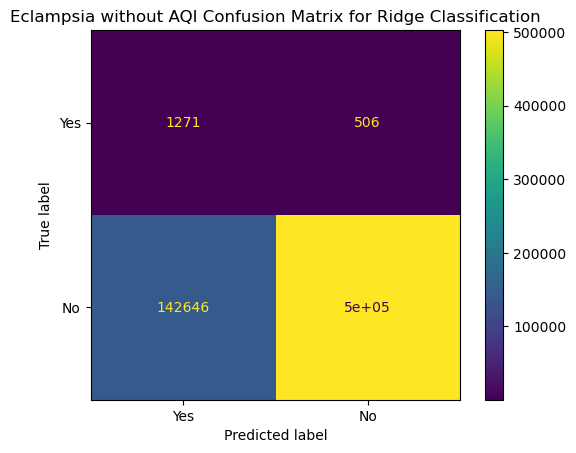

In [39]:
y_pred_only = RidgeCL.predict(Xte_only.T)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_only, y_pred_only, ax=ax)
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])
_ = ax.set_title(
    f"Eclampsia without AQI Confusion Matrix for Ridge Classification"
)

In [40]:
print(classification_report(Yte_only, y_pred_only))

              precision    recall  f1-score   support

           1       0.01      0.72      0.02      1777
           2       1.00      0.78      0.88    645233

    accuracy                           0.78    647010
   macro avg       0.50      0.75      0.45    647010
weighted avg       1.00      0.78      0.87    647010



## Ridge - Eclampsia with AQI

In [41]:
RidgeCL = RidgeClassifierCV(class_weight='balanced')
RidgeCL.fit(Xtr_AQI.T, Ytr_AQI)

RidgeClassifierCV(class_weight='balanced')

In [42]:
print("Training Score: {}".format(RidgeCL.score(Xtr_AQI.T, Ytr_AQI)))
print("Testing Score: {}".format(RidgeCL.score(Xte_AQI.T, Yte_AQI)))

Training Score: 0.787962237045114
Testing Score: 0.787955363904731


In [1]:
#tr_scores_ridge = cross_val_score(RidgeCL, Xtr_AQI.T, Ytr_AQI.T, cv=5)
#print("{} training accuracy with a standard deviation of {}".format(tr_scores_ridge.mean(), tr_scores_ridge.std()))

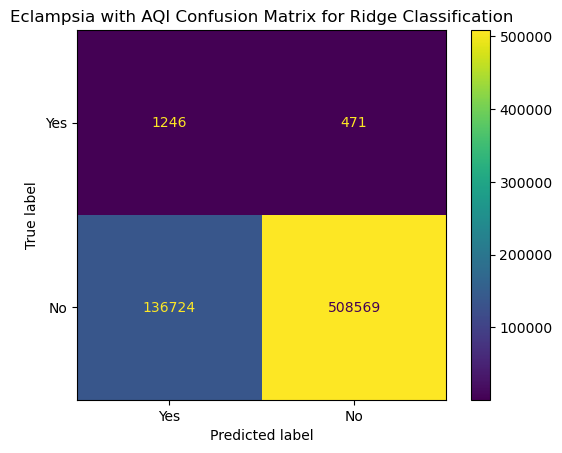

In [43]:
y_pred = RidgeCL.predict(Xte_AQI.T)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_AQI, y_pred, ax=ax)
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])
_ = ax.set_title(
    f"Eclampsia with AQI Confusion Matrix for Ridge Classification"
)

In [33]:
print(classification_report(Yte_AQI, y_pred))

              precision    recall  f1-score   support

           1       0.01      0.73      0.02      1717
           2       1.00      0.79      0.88    645293

    accuracy                           0.79    647010
   macro avg       0.50      0.76      0.45    647010
weighted avg       1.00      0.79      0.88    647010



## Ridge - Low Birth Weight without AQI

In [44]:
RidgeCL = RidgeClassifierCV(class_weight='balanced')
RidgeCL.fit(Xtr_only_lbw.T, Ytr_only_lbw)

RidgeClassifierCV(class_weight='balanced')

In [45]:
print("Training Score: {}".format(RidgeCL.score(Xtr_only_lbw.T, Ytr_only_lbw)))
print("Testing Score: {}".format(RidgeCL.score(Xte_only_lbw.T, Yte_only_lbw)))

#tr_scores_ridge_lbw_only = cross_val_score(RidgeCL, Xtr_only_pca_lbw, Ytr_only_lbw, cv=5)
#print("{} training accuracy with a standard deviation of {}".format(tr_scores_ridge_lbw_only.mean(), tr_scores_ridge_lbw_only.std()))

Training Score: 0.7721931647477954
Testing Score: 0.7726845749202321


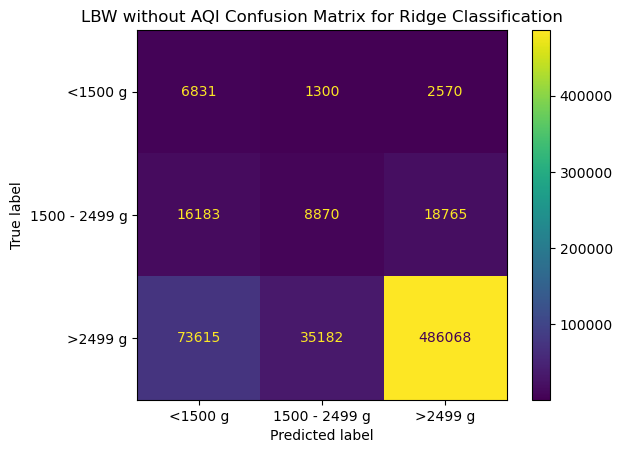

In [46]:
y_pred_lbw_only = RidgeCL.predict(Xte_only_lbw.T)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_only_lbw, y_pred_lbw_only, ax=ax)
ax.xaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
ax.yaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
_ = ax.set_title(
    f"LBW without AQI Confusion Matrix for Ridge Classification"
)

In [47]:
print(classification_report(Yte_only_lbw, y_pred_lbw_only))

              precision    recall  f1-score   support

           1       0.07      0.64      0.13     10701
           2       0.20      0.20      0.20     43818
           3       0.96      0.82      0.88    594865

    accuracy                           0.77    649384
   macro avg       0.41      0.55      0.40    649384
weighted avg       0.89      0.77      0.82    649384



## Ridge - Low Birth Weight with AQI

In [48]:
RidgeCL = RidgeClassifierCV(class_weight='balanced')
RidgeCL.fit(Xtr_AQI_lbw.T, Ytr_AQI_lbw)

RidgeClassifierCV(class_weight='balanced')

In [49]:
print("Training Score: {}".format(RidgeCL.score(Xtr_AQI_lbw.T, Ytr_AQI_lbw)))
print("Testing Score: {}".format(RidgeCL.score(Xte_AQI_lbw.T, Yte_AQI_lbw)))

Training Score: 0.7727352173253556
Testing Score: 0.7728863045593978


In [ ]:
#tr_scores_ridge_lbw = cross_val_score(RidgeCL, Xtr_AQI_lbw.T, Ytr_AQI_lbw, cv=5)
#print("{} training accuracy with a standard deviation of {}".format(tr_scores_ridge_lbw.mean(), tr_scores_ridge_lbw.std()))

0.5176471219632435 training accuracy with a standard deviation of 0.0007843040999238062


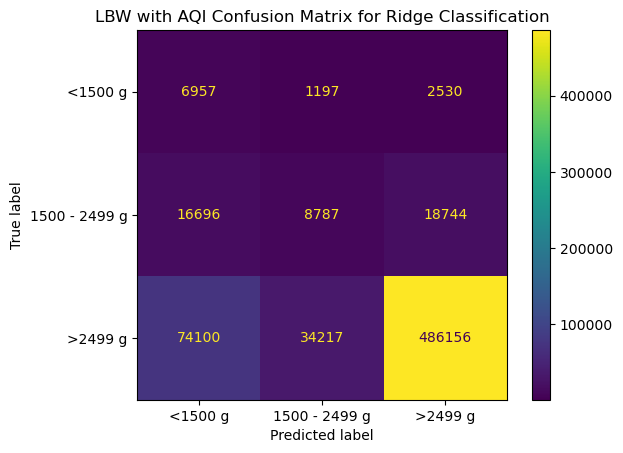

In [50]:
y_pred_lbw = RidgeCL.predict(Xte_AQI_lbw.T)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_AQI_lbw, y_pred_lbw, ax=ax)
ax.xaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
ax.yaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
_ = ax.set_title(
    f"LBW with AQI Confusion Matrix for Ridge Classification"
)

In [51]:
print(classification_report(Yte_AQI_lbw, y_pred_lbw))

              precision    recall  f1-score   support

           1       0.07      0.65      0.13     10684
           2       0.20      0.20      0.20     44227
           3       0.96      0.82      0.88    594473

    accuracy                           0.77    649384
   macro avg       0.41      0.56      0.40    649384
weighted avg       0.89      0.77      0.82    649384



## SVM - Eclampsia without AQI

In [ ]:
SVMCL = LinearSVC(class_weight='balanced',max_iter=500)
SVMCL.fit(Xtr_only_pca, Ytr_only)

In [ ]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(SVMCL.score(Xtr_only_pca, Ytr_only)))
print("Testing Score: {}".format(SVMCL.score(Xte_only_pca, Yte_only)))

#svm_train_score_only = cross_val_score(SVMCL, Xtr_only_pca, Ytr_only, cv=5)
#print("{} training accuracy with a standard deviation of {}".format(svm_train_score_only.mean(), svm_train_score_only.std()))

Training Score: 0.779362675755659
Testing Score: 0.7794454490657022


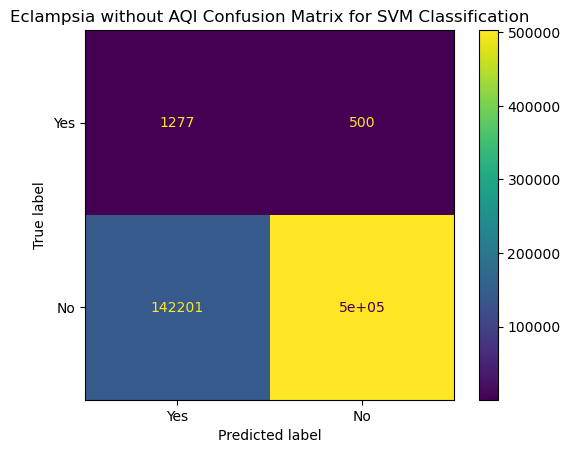

In [ ]:
y_pred_only = SVMCL.predict(Xte_only_pca)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_only, y_pred_only, ax=ax)
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])
_ = ax.set_title(
    f"Eclampsia without AQI Confusion Matrix for SVM Classification"
)

In [71]:
print(classification_report(Yte_only, y_pred_only))

              precision    recall  f1-score   support

           1       0.00      0.91      0.01      1777
           2       1.00      0.36      0.53    645233

    accuracy                           0.36    647010
   macro avg       0.50      0.64      0.27    647010
weighted avg       1.00      0.36      0.53    647010



## SVM - Eclampsia with AQI

In [ ]:
SVMCL = LinearSVC(class_weight='balanced')
SVMCL.fit(Xtr_AQI_pca, Ytr_AQI)

In [ ]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(SVMCL.score(Xtr_AQI_pca, Ytr_AQI)))
print("Testing Score: {}".format(SVMCL.score(Xte_AQI_pca, Yte_AQI)))

#svm_train_score = cross_val_score(SVMCL, Xtr_AQI_pca, Ytr_AQI, cv=5)
#print("{} training accuracy with a standard deviation of {}".format(svm_train_score.mean(), svm_train_score.std()))

Training Score: 0.4429620264609614
Testing Score: 0.44282004914916306
0.44551723986464964 training accuracy with a standard deviation of 0.004864236336924894


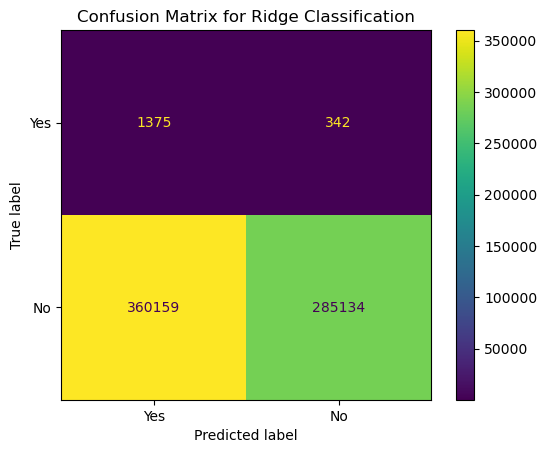

In [ ]:
y_pred = SVMCL.predict(Xte_AQI_pca)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_AQI, y_pred, ax=ax)
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])
_ = ax.set_title(
    f"Eclampsia with AQI Confusion Matrix for SVM Classification"
)

In [21]:
print(classification_report(Yte_AQI, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.80      0.01      1717
           2       1.00      0.44      0.61    645293

    accuracy                           0.44    647010
   macro avg       0.50      0.62      0.31    647010
weighted avg       1.00      0.44      0.61    647010



## SVM - Low Birth Weight without AQI

In [ ]:
SVMCL = LinearSVC(class_weight='balanced')
SVMCL.fit(Xtr_only_pca_lbw, Ytr_only_lbw)#

LinearSVC(class_weight='balanced')

In [ ]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(SVMCL.score(Xtr_only_pca_lbw, Ytr_only_lbw)))
print("Testing Score: {}".format(SVMCL.score(Xte_only_pca_lbw.T, Yte_only_lbw)))

#svm_train_score_lbw_only = cross_val_score(SVMCL, Xtr_only_pca_lbw, Ytr_only_lbw, cv=5)
#print("{} training accuracy with a standard deviation of {}".format(svm_train_score_lbw_only.mean(), svm_train_score_lbw_only.std()))

Training Score: 0.916048067128284
Testing Score: 0.9160450519261331
0.9160480671286788 training accuracy with a standard deviation of 9.048665080418852e-07


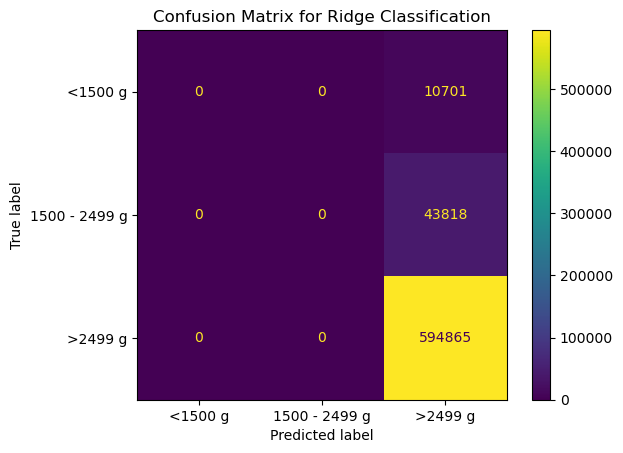

In [ ]:
y_pred_lbw_only = SVMCL.predict(Xte_only_pca_lbw)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_only_lbw, y_pred_lbw_only, ax=ax)
ax.xaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
ax.yaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
_ = ax.set_title(
    f"LBW without AQI Confusion Matrix for SVM Classification"
)

In [55]:
print(classification_report(Yte_only_lbw, y_pred_lbw_only))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10701
           2       0.00      0.00      0.00     43818
           3       0.92      1.00      0.96    594865

    accuracy                           0.92    649384
   macro avg       0.31      0.33      0.32    649384
weighted avg       0.84      0.92      0.88    649384



/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

## SVM - Low Birth Weight with AQI

In [ ]:
SVMCL = LinearSVC(class_weight='balanced')
SVMCL.fit(Xtr_AQI_pca_lbw, Ytr_AQI_lbw)

LinearSVC(class_weight='balanced')

In [ ]:
# estimate accuracy for Training and Testing

print("Training Score: {}".format(SVMCL.score(Xtr_AQI_pca_lbw, Ytr_AQI_lbw)))
print("Testing Score: {}".format(SVMCL.score(Xte_AQI_pca_lbw, Yte_AQI_lbw)))

#svm_train_score_lbw = cross_val_score(SVMCL, Xtr_AQI_pca_lbw, Ytr_AQI_lbw, cv=5)
#print("{} training accuracy with a standard deviation of {}".format(svm_train_score_lbw.mean(), svm_train_score_lbw.std()))

Training Score: 0.9161989794936274
Testing Score: 0.9154414029295456
0.916198979493726 training accuracy with a standard deviation of 7.564143114221896e-07


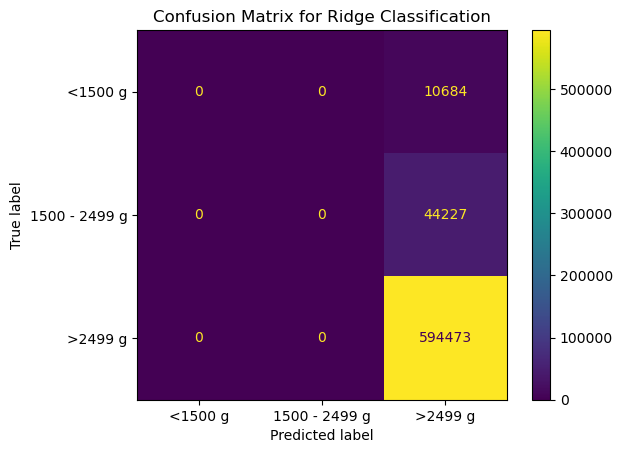

In [ ]:
y_pred_lbw = SVMCL.predict(Xte_AQI_pca_lbw)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_AQI_lbw, y_pred_lbw, ax=ax)
ax.xaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
ax.yaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
_ = ax.set_title(
    f"LBW with AQI Confusion Matrix for SVM Classification"
)

In [26]:
print(classification_report(Yte_AQI_lbw, y_pred_lbw))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10684
           2       0.00      0.00      0.00     44227
           3       0.92      1.00      0.96    594473

    accuracy                           0.92    649384
   macro avg       0.31      0.33      0.32    649384
weighted avg       0.84      0.92      0.88    649384



/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

## KNN - Eclampsia without AQI

In [15]:
KNNCL = KNeighborsClassifier(n_neighbors=5)
KNNCL.fit(Xtr_only_pca, Ytr_only)

KNeighborsClassifier()

In [16]:
# estimate accuracy for Training and Testing - for KNN 12 neighbors  

print("Training Score: {}".format(KNNCL.score(Xtr_only_pca, Ytr_only)))
print("Testing Score: {}".format(KNNCL.score(Xte_only_pca, Yte_only)))

knn_train_score_only = cross_val_score(KNNCL, Xtr_only_pca, Ytr_only, cv=5)
print("{} training accuracy with a standard deviation of {}".format(knn_train_score_only.mean(), knn_train_score_only.std()))

Training Score: 0.9972743841959105
Testing Score: 0.9972473377536669
0.9972566101228736 training accuracy with a standard deviation of 4.404164328341183e-06


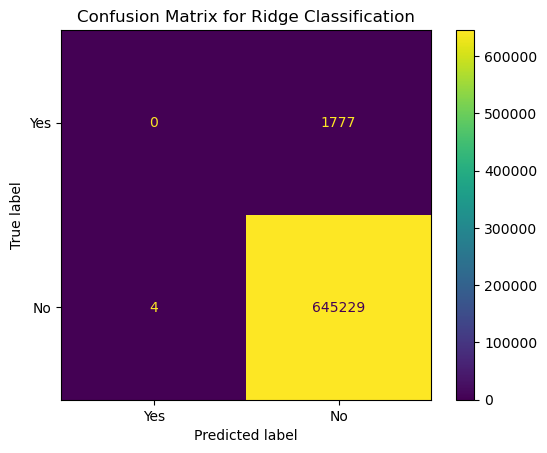

In [17]:
y_pred = KNNCL.predict(Xte_only_pca)


fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_only, y_pred, ax=ax)
ax.xaxis.set_ticklabels(['Yes', 'No'])
ax.yaxis.set_ticklabels(['Yes', 'No'])
_ = ax.set_title(
    f"Confusion Matrix for Ridge Classification"
)

In [ ]:
print(classification_report(Yte_only, y_pred))

In [33]:
# scale
scaler = StandardScaler()
Xtr_scaled_lbw = scaler.fit_transform(Xtr_AQI_pca_lbw)

# oversample
sm = SMOTE(random_state=42)
X_resampled_lbw, Y_resampled_lbw = sm.fit_resample(Xtr_scaled_lbw, Ytr_AQI_lbw)

# train model
svc = LinearSVC(class_weight='balanced', max_iter=5000)
svc.fit(X_resampled_lbw, Y_resampled_lbw)

# Predict (use scaled test data)
Xte_scaled_lbw = scaler.transform(Xte_AQI_pca_lbw)
Ypred_lbw = svc.predict(Xte_scaled_lbw)

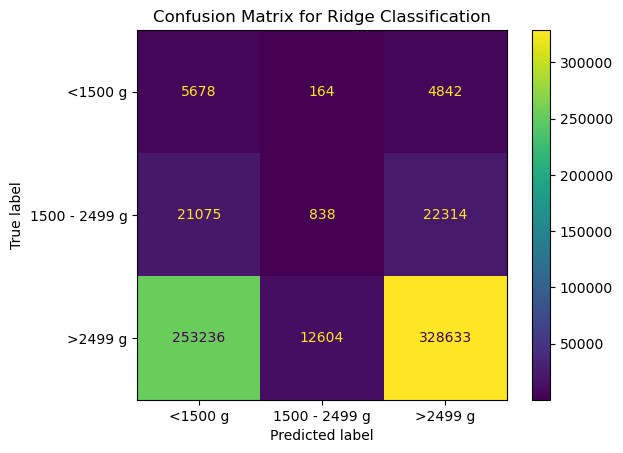

In [35]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(Yte_AQI_lbw, Ypred_lbw, ax=ax)
ax.xaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
ax.yaxis.set_ticklabels(['<1500 g', '1500 - 2499 g', '>2499 g'])
_ = ax.set_title(
    f"Confusion Matrix for Ridge Classification"
)

In [34]:
print(classification_report(Yte_AQI_lbw, Ypred_lbw))

              precision    recall  f1-score   support

           1       0.02      0.53      0.04     10684
           2       0.06      0.02      0.03     44227
           3       0.92      0.55      0.69    594473

    accuracy                           0.52    649384
   macro avg       0.34      0.37      0.25    649384
weighted avg       0.85      0.52      0.64    649384



In [ ]:
print(classification_report(Yte_AQI_lbw, Ypred_lbw))